In [18]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [19]:
df = pd.read_csv(r'data/stud.csv')

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
X = df.drop(columns=['math_score'],axis=1)

In [22]:
y = df['math_score']

In [23]:
# creating a column transformer with three types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
    ("OneHotEncode",OneHotEncoder(),cat_features),
    ("StandardScaler",StandardScaler(),num_features)
    ]
)

In [24]:
X = preprocessor.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse , model_train_r2= evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse , model_test_r2= evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3071
- Mean Absolute Error: 4.2304
- R2 Score: 0.8772
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4759
- Mean Absolute Error: 4.3722
- R2 Score: 0.8701


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5470
- Mean Absolute Error: 5.1436
- R2 Score: 0.8131
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.1022
- Mean Absolute Error: 4.9001
- R2 Score: 0.8387


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3041
- Mean Absolute Error: 4.2261
- R2 Score: 0.8774
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4622
- Mean Absolute Error: 4.3626
- R2 Score: 0.8708


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9527
- Mean Absolute Error: 4.6755
- R2 Score: 0.8455
-----------------------

In [40]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["model_name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,model_name,R2_score
2,Ridge,0.870759
0,Linear Regression,0.870106
7,CatBoosting Regressor,0.857674
5,Random Forest Regressor,0.851721
6,XGBRegressor,0.840691
1,Lasso,0.838694
8,AdaBoost Regressor,0.837141
3,K-Neighbors Regressor,0.829587
4,Decision Tree,0.759518


In [42]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f" Accuracy of the model is {score}")

 Accuracy of the model is 87.01061476685419


Text(0, 0.5, 'predicted_values')

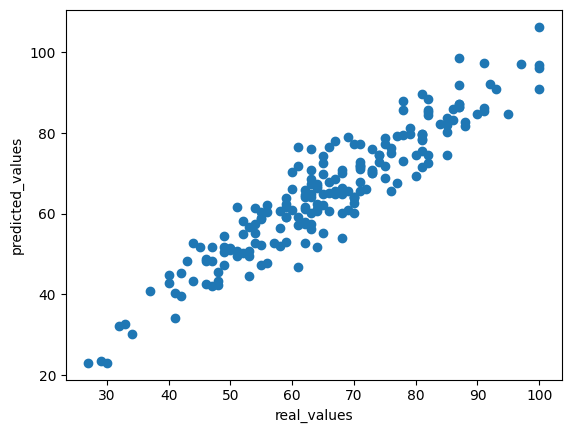

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel("real_values")
plt.ylabel("predicted_values")

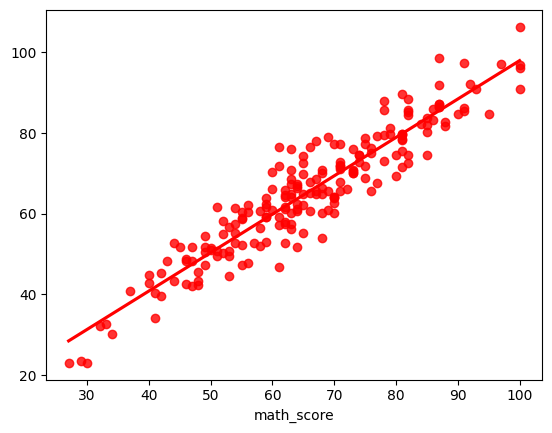

In [47]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [48]:
pd.DataFrame({"predicted":y_pred,"actual":y_test,"difference":y_test-y_pred})

,predicted,actual,difference
266,70.78125,63,-7.78125
861,78.46875,81,2.53125
895,32.21875,32,-0.21875
89,76.12500,73,-3.12500
442,59.31250,59,-0.31250
...,...,...,...
414,61.71875,51,-10.71875
772,58.15625,52,-6.15625
614,84.37500,82,-2.37500
218,76.59375,66,-10.59375
